In [0]:
#Initialising the Spark Session
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#defining the custom schema
from pyspark.sql.types import *

fields = StructType([StructField('unique_key',IntegerType(),False),
                    StructField('created_date',TimestampType(),True),
                    StructField('closed_date',TimestampType(),True),
                    StructField('agency',StringType(),True),
                    StructField('agency_name',StringType(),True),
                    StructField('complaint_type',StringType(),True),
                    StructField('descriptor',StringType(),False),
                    StructField('location_type',StringType(),False),
                    StructField('incident_zip',IntegerType(),False),
                    StructField('incident_address',StringType(),False),
                    StructField('street_name',StringType(),False),
                    StructField('cross_street_1',StringType(),False),
                    StructField('cross_street_2',StringType(),False),
                    StructField('intersection_street_1',StringType(),False),
                    StructField('intersection_street_2',StringType(),False),
                    StructField('address_type',StringType(),False),
                    StructField('city',StringType(),False),
                    StructField('landmark',StringType(),False),
                    StructField('status',StringType(),True),
                    StructField('resolution_description',StringType(),False),
                    StructField('resolution_action_updated_date',TimestampType(),False),
                    StructField('community_board',StringType(),True),
                    StructField('bbl',StringType(),False),
                    StructField('borough',StringType(),True),
                    StructField('x_coordinate_state_plane',IntegerType(),False),
                    StructField('y_coordinate_state_plane',IntegerType(),False),
                    StructField('open_data_channel_type',StringType(),True),
                    StructField('park_facility_name',StringType(),False),
                    StructField('park_borough',StringType(),False),
                    StructField('latitude',IntegerType(),True),
                    StructField('longitude',IntegerType(),True),
                    StructField('location',StringType(),True),
                    StructField('facility_type',StringType(),False),
                    StructField('bridge_highway_name',StringType(),False),
                    StructField('bridge_highway_direction',StringType(),False),
                    StructField('bridge_highway_segment',StringType(),False),            
                    StructField('taxi_company_borough',StringType(),False),
                    StructField('taxi_pick_up_location',StringType(),False),
                    StructField('road_ramp',StringType(),False),
                    StructField('due_date',TimestampType(),True),
                    StructField('vehicle_type',StringType(),False)
                    ])


In [0]:
#Reading dataset
fine_df_custom = spark.read.csv("dbfs:/FileStore/tables/jio2025/nyc_311_jan_2023_a.csv",
                         header = True,
                         schema = StructType(fields))

## Pre-Processing

In [0]:
#Quick check of dataset
fine_df_custom.show(2) 

+----------+-------------------+-------------------+------+--------------------+-------------------+----------------+--------------------+------------+--------------------+----------------+---------------+---------------+---------------------+---------------------+------------+--------+----------------+------+----------------------+------------------------------+---------------+----------+---------+------------------------+------------------------+----------------------+------------------+------------+--------+---------+--------------------+---------------+-------------------+------------------------+----------------------+--------------------+---------------------+---------+--------+------------+
|unique_key|       created_date|        closed_date|agency|         agency_name|     complaint_type|      descriptor|       location_type|incident_zip|    incident_address|     street_name| cross_street_1| cross_street_2|intersection_street_1|intersection_street_2|address_type|    city|      

In [0]:
#Printing schema and cahing dataframe for faster operation later on 
fine_df_custom.cache()
fine_df_custom.printSchema()

root
 |-- unique_key: integer (nullable = true)
 |-- created_date: timestamp (nullable = true)
 |-- closed_date: timestamp (nullable = true)
 |-- agency: string (nullable = true)
 |-- agency_name: string (nullable = true)
 |-- complaint_type: string (nullable = true)
 |-- descriptor: string (nullable = true)
 |-- location_type: string (nullable = true)
 |-- incident_zip: integer (nullable = true)
 |-- incident_address: string (nullable = true)
 |-- street_name: string (nullable = true)
 |-- cross_street_1: string (nullable = true)
 |-- cross_street_2: string (nullable = true)
 |-- intersection_street_1: string (nullable = true)
 |-- intersection_street_2: string (nullable = true)
 |-- address_type: string (nullable = true)
 |-- city: string (nullable = true)
 |-- landmark: string (nullable = true)
 |-- status: string (nullable = true)
 |-- resolution_description: string (nullable = true)
 |-- resolution_action_updated_date: timestamp (nullable = true)
 |-- community_board: string (null

In [0]:
#Checking type of dataframe
type(fine_df_custom)

Out[6]: pyspark.sql.dataframe.DataFrame

### Duplicates

In [0]:
#Importing al lthe Pyspark functions use at various places in code
import pyspark.sql.functions as F 

In [0]:
fine_df_custom.select(F.col('location')).show()

+--------------------+
|            location|
+--------------------+
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
|"{'latitude': '40...|
+--------------------+
only showing top 20 rows



In [0]:
#Finding duplicates
duplicate_pairs = (fine_df_custom
                   .groupBy('unique_key')
                   .count()
                   .filter(F.col('count') > 1)
                  )
duplicate_pairs.show()

+----------+-----+
|unique_key|count|
+----------+-----+
|  56490255|    2|
+----------+-----+



In [0]:
#dropping duplicate instances
fine_df_custom = fine_df_custom.dropDuplicates(['unique_key'])

In [0]:
fine_df_custom.describe()

Out[11]: DataFrame[summary: string, unique_key: string, agency: string, agency_name: string, complaint_type: string, descriptor: string, location_type: string, incident_zip: string, incident_address: string, street_name: string, cross_street_1: string, cross_street_2: string, intersection_street_1: string, intersection_street_2: string, address_type: string, city: string, landmark: string, status: string, resolution_description: string, community_board: string, bbl: string, borough: string, x_coordinate_state_plane: string, y_coordinate_state_plane: string, open_data_channel_type: string, park_facility_name: string, park_borough: string, latitude: string, longitude: string, location: string, facility_type: string, bridge_highway_name: string, bridge_highway_direction: string, bridge_highway_segment: string, taxi_company_borough: string, taxi_pick_up_location: string, road_ramp: string, vehicle_type: string]

In [0]:
#spark.sql("DROP TABLE IF EXISTS fine_df_custom_table")
#dbutils.fs.rm("dbfs:/user/hive/warehouse/fine_df_custom_table", recurse=True)
#fine_df_custom.write.saveAsTable("fine_df_custom_table", format = 'parquet')

In [0]:
%sql

--Checking if the duplicate instance is removed
SELECT * from fine_df_custom_table WHERE unique_key = 56490255;

unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,facility_type,bridge_highway_name,bridge_highway_direction,bridge_highway_segment,taxi_company_borough,taxi_pick_up_location,road_ramp,due_date,vehicle_type,Day_of_Month,status_class,absolute_time_delta_days
56490255,2023-01-10T12:28:56.000+0000,2023-01-16T14:09:08.000+0000,HPD,Department of Housing Preservation and Development,PLUMBING,WATER SUPPLY,RESIDENTIAL BUILDING,11369,24-37 89 STREET,89 STREET,null,null,null,null,ADDRESS,EAST ELMHURST,null,Closed,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,2023-01-16T00:00:00.000+0000,03 QUEENS,4011010029,QUEENS,1017465,218193,ONLINE,Unspecified,QUEENS,null,null,"""{'latitude': '40.765503401218645', 'longitude': '-73.88009384645684', 'human_address': '{""""address"""": """"""""","""""city"""": """"""""","""""state"""": """"""""","""""zip"""": """"""""}'}""",null,null,null,null,null,null,10,Closed,6


## 7 Insights from the dataset using Spark Dataframe or SQL abstractions

### Insight 1: Zipcode wise maximum complaints 

In [0]:
#Importing Window module to creating windows/Partition  to get set of values to run function on 
from pyspark.sql.window import Window

#counting instances after grouping by incident_zip code and complaint type
complaint_counts = fine_df_custom.groupBy('incident_zip','complaint_type').agg((F.count('*').alias('count')))

#Defining window partition by incident_zip and ordering it by desc
window_zipcode = Window.partitionBy('incident_zip').orderBy(F.col('count').desc())

#add a column 'rank' such that each row per partition has 1 against maximum count
ranked_complaints = complaint_counts.withColumn('rank',F.row_number().over(window_zipcode))

#filtering onyl rows wehre rank equals 1 since we need top complaint type per zipcode
max_complaint_per_zipcode = ranked_complaints.filter(F.col('rank') == 1).drop('rank').orderBy(F.col('count').desc())

max_complaint_per_zipcode.show()

+------------+-------------------+-----+
|incident_zip|     complaint_type|count|
+------------+-------------------+-----+
|       11201|    Illegal Parking| 1332|
|       10457|     HEAT/HOT WATER| 1136|
|       10467|     HEAT/HOT WATER| 1032|
|       10468|     HEAT/HOT WATER| 1012|
|       10023| Noise - Helicopter| 1004|
|       11385|    Illegal Parking|  988|
|       10458|     HEAT/HOT WATER|  980|
|       10452|     HEAT/HOT WATER|  910|
|       11226|     HEAT/HOT WATER|  854|
|       11214|    Illegal Parking|  768|
|       10032|     HEAT/HOT WATER|  729|
|       11231|    Illegal Parking|  724|
|       10453|     HEAT/HOT WATER|  706|
|       10472|     HEAT/HOT WATER|  662|
|       10462|     HEAT/HOT WATER|  650|
|       11101|    Illegal Parking|  634|
|       11209|    Illegal Parking|  626|
|       11378|    Illegal Parking|  587|
|       11205|    Illegal Parking|  560|
|       10456|Noise - Residential|  558|
+------------+-------------------+-----+
only showing top

### Insight 2: Top five complaints in New York

In [0]:
#Counting number of complaints by each complaint type
complaint_counts = (fine_df_custom
                    .groupBy('complaint_type')
                    .agg(F.count('unique_key').alias('total_complaint'))
                    .orderBy(F.col('total_complaint').desc())
                    )
                    
complaint_counts.show(5)


+--------------------+---------------+
|      complaint_type|total_complaint|
+--------------------+---------------+
|     Illegal Parking|          34675|
|      HEAT/HOT WATER|          28163|
| Noise - Residential|          20381|
|    Blocked Driveway|          12223|
|UNSANITARY CONDITION|           7709|
+--------------------+---------------+
only showing top 5 rows



### Insight 3:  Citywise top 3 complaint types

In [0]:
#Getting number of distinct cities in dataset
(fine_df_custom
            .select(F.col('city'))
            .distinct()
            .count()
)

Out[16]: 72

In [0]:
#counting complaint type wise and  city wise
complaint_counts_city_wise = (fine_df_custom
                              .groupBy('city','complaint_type')
                              .count()
                              .orderBy(F.col('count').desc())
                                )
                              

complaint_counts_city_wise.show()

+--------+--------------------+-----+
|    city|      complaint_type|count|
+--------+--------------------+-----+
|BROOKLYN|     Illegal Parking|13174|
|   BRONX|      HEAT/HOT WATER|11129|
|BROOKLYN|      HEAT/HOT WATER| 7186|
|NEW YORK|      HEAT/HOT WATER| 6033|
|BROOKLYN| Noise - Residential| 5599|
|   BRONX| Noise - Residential| 5508|
|   BRONX|     Illegal Parking| 5405|
|NEW YORK| Noise - Residential| 4774|
|BROOKLYN|    Blocked Driveway| 4451|
|NEW YORK|     Illegal Parking| 3723|
|   BRONX|UNSANITARY CONDITION| 2705|
|    null|     Illegal Parking| 2287|
|BROOKLYN|UNSANITARY CONDITION| 2254|
|   BRONX|    Blocked Driveway| 2013|
|NEW YORK|Noise - Street/Si...| 1903|
|NEW YORK|  Noise - Helicopter| 1850|
|   BRONX|            PLUMBING| 1788|
|   BRONX|       PAINT/PLASTER| 1606|
|NEW YORK|UNSANITARY CONDITION| 1575|
|BROOKLYN|   Abandoned Vehicle| 1554|
+--------+--------------------+-----+
only showing top 20 rows



In [0]:
#creating window partition based on city and order by count
window_city = Window.partitionBy('city').orderBy(F.col('count').desc())
                

#add row number to assigned ranks to the sorted rows based on city partitions
ranked_complaint_counts_city_wise = complaint_counts_city_wise.withColumn('rank',F.row_number().over(window_city))


ranked_complaint_counts_city_wise.show()

+----+--------------------+-----+----+
|city|      complaint_type|count|rank|
+----+--------------------+-----+----+
|null|     Illegal Parking| 2287|   1|
|null|    Street Condition|  618|   2|
|null|Noise - Street/Si...|  522|   3|
|null|Homeless Person A...|  518|   4|
|null|          Encampment|  436|   5|
|null|   Abandoned Vehicle|  380|   6|
|null|     Noise - Vehicle|  334|   7|
|null|   Derelict Vehicles|  333|   8|
|null|   Highway Condition|  312|   9|
|null|     Illegal Dumping|  274|  10|
|null|         Panhandling|  240|  11|
|null|     Dirty Condition|  221|  12|
|null|       Lost Property|  221|  13|
|null|Traffic Signal Co...|  193|  14|
|null| Noise - Residential|  186|  15|
|null|         Dead Animal|  172|  16|
|null|Street Light Cond...|  136|  17|
|null|    Blocked Driveway|  128|  18|
|null|Street Sweeping C...|  120|  19|
|null|      Taxi Complaint|  116|  20|
+----+--------------------+-----+----+
only showing top 20 rows



In [0]:
#getting top ranked complaint city wise
(ranked_complaint_counts_city_wise
    .filter((F.col('rank') == 1) 
            &
            (F.col('city').isNotNull())
            )
    .orderBy(F.col('count').desc())
    .show()
)

+----------------+--------------------+-----+----+
|            city|      complaint_type|count|rank|
+----------------+--------------------+-----+----+
|        BROOKLYN|     Illegal Parking|13174|   1|
|           BRONX|      HEAT/HOT WATER|11129|   1|
|        NEW YORK|      HEAT/HOT WATER| 6033|   1|
|          QUEENS|    Street Condition| 1377|   1|
|   STATEN ISLAND|    Street Condition|  955|   1|
|       RIDGEWOOD|     Illegal Parking|  872|   1|
|         ASTORIA|     Illegal Parking|  853|   1|
|       MANHATTAN|Street Light Cond...|  705|   1|
|LONG ISLAND CITY|     Illegal Parking|  637|   1|
|         MASPETH|     Illegal Parking|  569|   1|
|        FLUSHING|    Blocked Driveway|  562|   1|
|    HOWARD BEACH|  Noise - Helicopter|  520|   1|
|         JAMAICA| Noise - Residential|  478|   1|
|        WOODSIDE|     Illegal Parking|  452|   1|
|          CORONA|    Blocked Driveway|  435|   1|
|       WOODHAVEN|     Illegal Parking|  397|   1|
|  MIDDLE VILLAGE|     Illegal 

In [0]:
#Geting top 3 complaint types for each city
(ranked_complaint_counts_city_wise
    .filter(
            (F.col('rank').isin([1,2,3]))
            &
            (F.col('city').isNotNull())
            )
    .orderBy(F.col('city'))
    .show()
)

+------------+-------------------+-----+----+
|        city|     complaint_type|count|rank|
+------------+-------------------+-----+----+
|     ARVERNE|     HEAT/HOT WATER|   54|   1|
|     ARVERNE|Noise - Residential|   38|   2|
|     ARVERNE|    Illegal Parking|   30|   3|
|     ASTORIA|    Illegal Parking|  853|   1|
|     ASTORIA|   Blocked Driveway|  373|   2|
|     ASTORIA|Noise - Residential|  324|   3|
|     BAYSIDE|    Illegal Parking|  271|   1|
|     BAYSIDE|Noise - Residential|   59|   2|
|     BAYSIDE|   Blocked Driveway|   51|   3|
|   BELLEROSE|    Illegal Parking|   34|   1|
|   BELLEROSE|   Blocked Driveway|   12|   2|
|   BELLEROSE|Noise - Residential|   12|   3|
|BREEZY POINT|    Illegal Parking|    4|   1|
|BREEZY POINT|        Panhandling|    1|   2|
|BREEZY POINT|   Street Condition|    1|   3|
|       BRONX|     HEAT/HOT WATER|11129|   1|
|       BRONX|Noise - Residential| 5508|   2|
|       BRONX|    Illegal Parking| 5405|   3|
|    BROOKLYN|    Illegal Parking|

### Insight 4: Overall distribution of complaint types

In [0]:
#importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [0]:
complaint_counts.show()

+--------------------+---------------+
|      complaint_type|total_complaint|
+--------------------+---------------+
|     Illegal Parking|          34675|
|      HEAT/HOT WATER|          28163|
| Noise - Residential|          20381|
|    Blocked Driveway|          12223|
|UNSANITARY CONDITION|           7709|
|    Street Condition|           6230|
|   Abandoned Vehicle|           4996|
|            PLUMBING|           4903|
|Noise - Street/Si...|           4731|
|  Noise - Commercial|           4089|
|       PAINT/PLASTER|           3989|
|   Missed Collection|           3908|
|        Water System|           3886|
|Street Light Cond...|           3789|
|               Noise|           3758|
|   Derelict Vehicles|           3725|
|         DOOR/WINDOW|           3247|
|  Noise - Helicopter|           3182|
|     Dirty Condition|           3170|
|Traffic Signal Co...|           3017|
+--------------------+---------------+
only showing top 20 rows



In [0]:
#Getting into pandas dataframe to use plots
complaint_counts_pandas = complaint_counts.toPandas()
complaint_counts_pandas = complaint_counts_pandas[complaint_counts_pandas['total_complaint']> 1500]

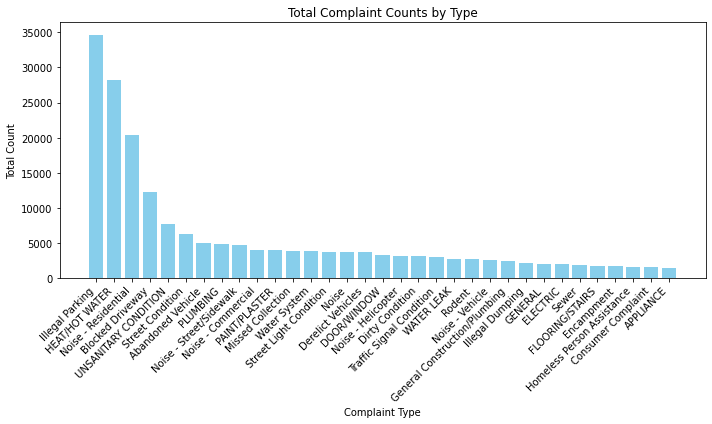

In [0]:
# Plotting the results using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(complaint_counts_pandas['complaint_type'],complaint_counts_pandas['total_complaint'] , color='skyblue')
plt.xlabel('Complaint Type')
plt.ylabel('Total Count')
plt.title('Total Complaint Counts by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insight 5: Status of Open & Closed Request Day wise

In [0]:
#Adding columns to get day of the month when the ticket is created
fine_df_custom = fine_df_custom.withColumn("Day_of_Month",F.dayofmonth('created_date'))

In [0]:
#Getting a dataframe with  
fine_df_custom = (fine_df_custom
                  .withColumn('status_class',
                              F.when(F.col('status') != 'Closed', 'Open')
                              .otherwise('Closed')
                              )
                  )
requests_day_wise = (fine_df_custom
                    .groupBy('Day_of_Month','status_class')
                    .agg(F.count('unique_key')
                    .alias('count_requests'))
                    .sort('Day_of_Month')
                    )
                     

#Geeting into pandas dataframe
requests_day_wise_pandas = requests_day_wise.toPandas()
requests_day_wise_pandas.head(10)

,Day_of_Month,status_class,count_requests
0,1,Closed,6160
1,1,Open,49
2,2,Closed,6553
3,2,Open,124
4,3,Open,187
5,3,Closed,8067
6,4,Open,196
7,4,Closed,8266
8,5,Closed,8289
9,5,Open,123


Out[27]: <matplotlib.legend.Legend at 0x7fa9144233a0>

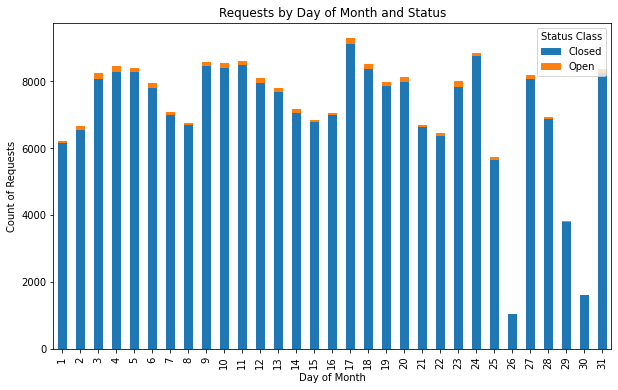

In [0]:
# Pivot the DataFrame to have 'Closed' and 'Open' as columns
pivot_df = requests_day_wise_pandas.pivot(index='Day_of_Month',
                                          columns='status_class',
                                          values='count_requests')

fig, ax = plt.subplots(figsize = (10,6))
pivot_df.plot(kind ='bar',
              stacked = True,
              ax = ax,
              color = ['#1f77b4', '#ff7f0e'])

ax.set_xlabel('Day of Month')
ax.set_ylabel('Count of Requests')
ax.set_title('Requests by Day of Month and Status')
ax.legend(title = 'Status Class')

Out[28]: <AxesSubplot:xlabel='Day_of_Month'>

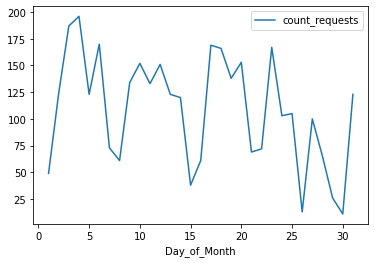

In [0]:
#Visually understanding how many request get created day wise
requests_day_wise_pandas[requests_day_wise_pandas.status_class == 'Open'].plot(x = 'Day_of_Month',
                                                                               y = 'count_requests')

Out[29]: <AxesSubplot:xlabel='Day_of_Month'>

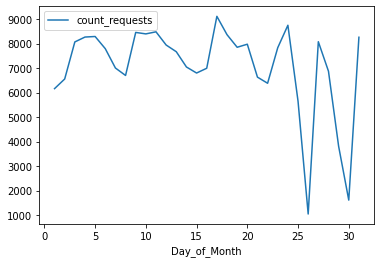

In [0]:
#Visually understanding how many request get closed day wise
requests_day_wise_pandas[requests_day_wise_pandas.status_class == 'Closed'].plot(x = 'Day_of_Month',
                                                                               y = 'count_requests')

### Insights 6: Time delta

In [0]:
#Adding new columns 'time_delta' to the dataset which is difference in days between request creation and closed date & time
fine_df_custom = (fine_df_custom
                  .withColumn('absolute_time_delta_days',
                               F.abs(
                                   F.datediff(F.col('closed_date'), F.col('created_date'))
                                   )
                               )
                  .where(F.col('absolute_time_delta_days').isNotNull())
                )

fine_df_custom.select('unique_key','absolute_time_delta_days').show()

+----------+------------------------+
|unique_key|absolute_time_delta_days|
+----------+------------------------+
|  56678249|                       1|
|  56675812|                       1|
|  56669662|                       0|
|  56671986|                       1|
|  56671983|                       0|
|  56670395|                      84|
|  56678470|                       0|
|  56676598|                       1|
|  56675349|                      23|
|  56670572|                       1|
|  56677827|                       0|
|  56675501|                       1|
|  56675536|                       0|
|  56674285|                      34|
|  56677453|                       1|
|  56670700|                       1|
|  56675078|                      21|
|  56670241|                       0|
|  56677257|                       0|
|  56675843|                       1|
+----------+------------------------+
only showing top 20 rows



In [0]:
# Calculating days required to close a given ticket. Exclusing those which are yet open.
closed_request_time = fine_df_custom.select('unique_key','closed_date','created_date','absolute_time_delta_days')

#Creating Table view for using SQL abstraction
closed_request_time.createOrReplaceTempView('closed_request_time_table')

In [0]:
#Number of Ticket closed in less than a day
same_day_closed = spark.sql('''SELECT count('unique_key') AS number_of_requests
FROM closed_request_time_table
GROUP BY  absolute_time_delta_days
ORDER BY absolute_time_delta_days 
LIMIT 1''')

same_day_closed.show()

+------------------+
|number_of_requests|
+------------------+
|             99042|
+------------------+



### Insights 7: Finding trend of request creation

In [0]:
#Geting count of request created on given day of the month
month_wise_requests = spark.sql('''
                                SELECT count(unique_key) AS no_of_requests, Day_of_Month
                                FROM fine_df_custom_table
                                WHERE status = 'Open'
                                GROUP BY Day_of_Month
                                ORDER BY Day_of_Month 
                                ''')

month_wise_requests.show()


+--------------+------------+
|no_of_requests|Day_of_Month|
+--------------+------------+
|             1|           1|
|             2|           2|
|             3|           3|
|             8|           4|
|             1|           5|
|             2|           6|
|             1|           7|
|             3|           8|
|             2|           9|
|            10|          10|
|             3|          11|
|             7|          12|
|             2|          13|
|             1|          15|
|             2|          16|
|             4|          17|
|             6|          18|
|             4|          19|
|             1|          20|
|             2|          21|
+--------------+------------+
only showing top 20 rows



In [0]:
# Finding trend of requests getting created in a day using moving average method
#Defining window size of 7 rows centered moving average

window_moving_avg = Window.orderBy('Day_of_Month').rowsBetween(-3,3)

#Adding the 'trend' column consisting of moving average values of 7 days.
month_wise_requests = (month_wise_requests
                       .withColumn('Trend_request_creation',F.avg('no_of_requests')
                                   .over(window_moving_avg))
                       )
month_wise_requests = month_wise_requests.withColumn('Trend_request_creation',F.ceil('Trend_request_creation'))
month_wise_requests.show()

+--------------+------------+----------------------+
|no_of_requests|Day_of_Month|Trend_request_creation|
+--------------+------------+----------------------+
|             1|           1|                     4|
|             2|           2|                     3|
|             3|           3|                     3|
|             8|           4|                     3|
|             1|           5|                     3|
|             2|           6|                     3|
|             1|           7|                     4|
|             3|           8|                     4|
|             2|           9|                     4|
|            10|          10|                     4|
|             3|          11|                     4|
|             7|          12|                     4|
|             2|          13|                     5|
|             1|          15|                     4|
|             2|          16|                     4|
|             4|          17|                 

Out[44]: <AxesSubplot:xlabel='Day_of_Month'>

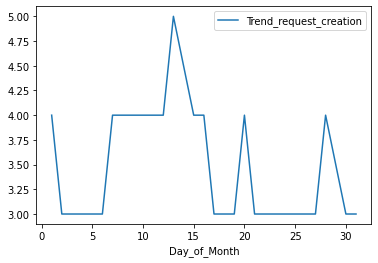

In [0]:
#Plotting the trend 
month_wise_requests.toPandas().plot(x = 'Day_of_Month',
                                    y = 'Trend_request_creation')